# **Load Library**

In [ ]:
# Librerie Generiche
import pandas as pd
import numpy as np
import tensorflow as tf
from time import time
import seaborn as sns
import string
from string import punctuation
punctuation = punctuation
import re

# SKLEARN
import sklearn
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# MATPLOTLIB 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# TextBlob - NLTK - Wordcloud
import textblob
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
import nltk
nltk.download('wordnet')
from wordcloud import WordCloud

from keras.preprocessing.text import Tokenizer

#natural language processing

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

#handle sparse matrices
from scipy import sparse

np.random.seed(1234)
tf.random.set_seed(1234)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/TEXT MINING/DATASET/drugsCom_raw.zip" -d "/content"

Archive:  /content/drive/MyDrive/Colab Notebooks/TEXT MINING/DATASET/drugsCom_raw.zip
  inflating: /content/drugsComTest_raw.tsv  
  inflating: /content/drugsComTrain_raw.tsv  


In [ ]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('/content/drugsComTrain_raw.tsv', sep='\t')

In [ ]:
# clean dataset

df = df.dropna()
df = df.drop_duplicates(subset=['review'], ignore_index=True)
df.columns = df.columns.str.lower()
df['sentiment_rate'] = df['rating'].apply(lambda x: 1 if x > 5 else 0)

# **Pre-processing**

In [ ]:
# clean review - normalization
df['review'] = df['review'].str.lower()
df['review'] = df['review'].str.replace('[^\w\s]', "")
df['review'] = df['review'].str.replace("&#039;", "")
df['review'] = df['review'].str.replace("[\d-]", "")
df['review'] = df['review'].str.replace("[^\w\s]", "") 
df['review'] = df['review'].str.replace(r'/^\s+|\s+$|\s+(?=\s)/g', '')
df['review'] = df['review'].str.replace(r'\s+',' ')
df.review.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    it has no side effect i take it in combination of bystolic mg and fish oil
1    my son is halfway through his fourth week of intuniv we became concerned when he began this last week when he started taking the highest dose he will be on for two days he could hardly get out of bed was very cranky and slept for nearly hours on a drive home from school vaca

In [ ]:
# tokens

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from keras.preprocessing.text import Tokenizer

tokenizer = RegexpTokenizer(r'\w+')
df["tokens"] = df["review"].apply(tokenizer.tokenize)
df['tokens']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [it, has, no, side, effect, i, take, it, in, combination, of, bystolic, mg, and, fish, oil]
1                                                              [my, son, is, halfway, through, his, fourth, week, of, intuniv, we, became, concerned, when, he, began, this, last, week, when, he, started, taking, the, highest, dose, he, will, be, on, for, two, days, he, could, hardly, get, out, of, bed, was, very, cranky, and, slept, for, 

In [ ]:
# Removing the stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
df.review

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                           side effect take combination bystolic mg fish oil
1                                                                              son halfway fourth week intuniv became concerned began last week started taking highest dose two days could hardly get bed cranky slept nearly hours drive home school vacation unusual called doctor monday morning said stick days see school getting morning last two days problem free much agreeable ever less emotional good thing less cranky remembering things overall behavior better tried many different medica

In [ ]:
# Removing the word stems using the Snowball Stemmer
from nltk.stem import SnowballStemmer
Snow_ball = SnowballStemmer("english")
df['review'] = df['review'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))
df.review

0                                                                                                                                                                                                                                                                                                                                                                                                                                side effect take combin bystol mg fish oil
1                                                                                       son halfway fourth week intuniv becam concern began last week start take highest dose two day could hard get bed cranki slept near hour drive home school vacat unusu call doctor monday morn said stick day see school get morn last two day problem free much agreeabl ever less emot good thing less cranki rememb thing overal behavior better tri mani differ medic far effect
2                                                     use take anoth oral contra

# **Text-Representation**

In [ ]:
df_0 = df[df.sentiment_rate == 0].sample(5500)
df_1 = df[df.sentiment_rate == 1].sample(5500)


df_sample = pd.concat([df_0, df_1])

df_sample = shuffle(df_sample)

In [ ]:
# Bag of words 

vectorizer_bow_ = CountVectorizer()
X = vectorizer_bow_.fit_transform(df_sample['review'])
bow_f = vectorizer_bow_.get_feature_names()
bow_x = X.toarray()
bow_df = pd.DataFrame(bow_x, columns=bow_f)
bow_df.head()

,_which,aa,aaaaarg,aamp,aampd,aana,aarp,ab,aband,abandon,abat,abcess,abd,abdomen,abdomin,abduct,abe,abid,abil,abilifi,abilifyjust,abit,abject,abl,ablat,ablationso,abnorm,abonorm,abort,aboutstuff,abreva,abrevaquot,abrupt,abscess,abscessinfect,absenc,absent,absente,absentmind,absolut,...,zombi,zombiefi,zombiei,zombieish,zombielik,zombif,zombifi,zometa,zomig,zomitriptan,zomitriptanit,zone,zonegran,zonesamid,zonisamid,zonk,zopiclon,zopliclon,zosyn,zovia,zovirax,zpac,zpack,zpak,zub,zubsolv,zumba,zyban,zyclara,zydeco,zydus,zyneret,zyprexa,zyrtec,zythromax,zyvox,zzquill,zzzquil,zzzquill,zzzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# WordCloud

ds_usefulCount_sample = df_sample.sort_values(by='usefulcount',ascending=False)
ds_usefulCount_tot = df.sort_values(by='usefulcount',ascending=False)

In [ ]:
ds_usefulCount_s = ds_usefulCount_sample[:100]
ds_usefulCount_t = ds_usefulCount_tot[:100]

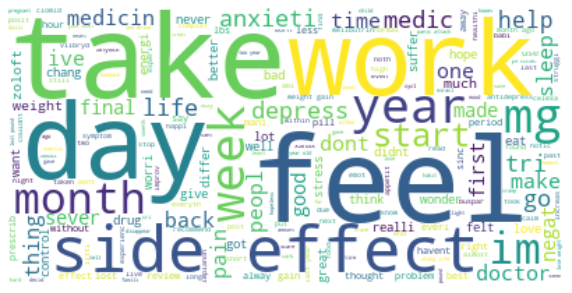

In [ ]:
# wordcloud tot

reviews_str = ds_usefulCount_t.review.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

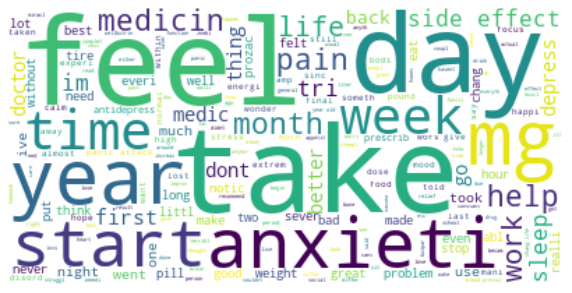

In [ ]:
# wordcloud sample

reviews_str = ds_usefulCount_s.review.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# **Build Machine Learning Algorithms**

In [ ]:
bow_x.shape

(11000, 14239)

In [ ]:
target = df_sample['sentiment_rate']
k = int(bow_x.shape[1]*0.70) 
best_features = SelectKBest(score_func=f_classif, k=k)
BoW_reduced = best_features.fit_transform(bow_x, target)

In [ ]:
BoW_reduced.shape

(11000, 9967)

In [ ]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(0.95)
PCA = pca.fit(BoW_reduced)
PCA_ = PCA.fit_transform(BoW_reduced)

In [ ]:
PCA_.shape

(11000, 1128)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(PCA_, target, test_size = 0.2, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (8800, 1128)
The Test set size  (2200, 1128)


In [ ]:
target_names = ['Negative', 'Positive']

In [ ]:
# LOGISTIC REGRESSION

model = LogisticRegression()

# Training
clf_LR = model.fit(X_train, y_train)

# Pred
y_pred_LR = clf_LR.predict(X_test)
# Classificaiton report
print('Logistic Regression Classification report:')
print(classification_report(y_test, y_pred_LR, target_names=target_names))

Logistic Regression Classification report:
              precision    recall  f1-score   support

    Negative       0.77      0.76      0.77      1120
    Positive       0.76      0.77      0.76      1080

    accuracy                           0.77      2200
   macro avg       0.76      0.77      0.76      2200
weighted avg       0.77      0.77      0.77      2200



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Random Forest

model_RF = RandomForestClassifier()

clf_RF = model_RF.fit(X_train, y_train)

# Pred
y_pred_RF = clf_RF.predict(X_test)

# Classificaiton report
print('Random Forest Classification report:')
print(classification_report(y_test, y_pred_RF, target_names=target_names))

Random Forest Classification report:
              precision    recall  f1-score   support

    Negative       0.63      0.64      0.63      1120
    Positive       0.62      0.60      0.61      1080

    accuracy                           0.62      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.62      0.62      0.62      2200



In [ ]:
# Gaussian NB
model_GNB= GaussianNB()

clf_GNB = model_GNB.fit(X_train, y_train)

# Pred
y_pred_GNB = clf_GNB.predict(X_test)

# Classificaiton report
print('Gaussian Naive Bayes Classification report:')
print(classification_report(y_test, y_pred_GNB, target_names=target_names))

Gaussian Naive Bayes Classification report:
              precision    recall  f1-score   support

    Negative       0.55      0.64      0.59      1120
    Positive       0.55      0.46      0.50      1080

    accuracy                           0.55      2200
   macro avg       0.55      0.55      0.55      2200
weighted avg       0.55      0.55      0.55      2200



In [ ]:
# KNeighbors

model_KNN= KNeighborsClassifier()

clf_KNN = model_KNN.fit(X_train, y_train)

# Pred
y_pred_KNN = clf_KNN.predict(X_test)

# Classificaiton report
print('KNN Classification report:')
print(classification_report(y_test, y_pred_KNN, target_names=target_names))

KNN Classification report:
              precision    recall  f1-score   support

    Negative       0.62      0.64      0.63      1120
    Positive       0.61      0.59      0.60      1080

    accuracy                           0.62      2200
   macro avg       0.62      0.61      0.61      2200
weighted avg       0.62      0.62      0.62      2200



In [ ]:
# Decision Tree
model_DT= DecisionTreeClassifier()

clf_DT = model_DT.fit(X_train, y_train)

# Pred
y_pred_DT = clf_DT.predict(X_test)

# Classificaiton report
print('Decision Tree report:')
print(classification_report(y_test, y_pred_DT, target_names=target_names))

Decision Tree report:
              precision    recall  f1-score   support

    Negative       0.57      0.56      0.57      1120
    Positive       0.56      0.57      0.56      1080

    accuracy                           0.56      2200
   macro avg       0.57      0.57      0.56      2200
weighted avg       0.57      0.56      0.57      2200



In [ ]:
# SVM

model_SVM = SVC()

clf_SVM = model_SVM.fit(X_train, y_train)

# Pred
y_pred_SVM = clf_SVM.predict(X_test)

# Classificaiton report
print('SVM report:')
print(classification_report(y_test, y_pred_SVM, target_names=target_names))

SVM report:
              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78      1120
    Positive       0.77      0.79      0.78      1080

    accuracy                           0.78      2200
   macro avg       0.78      0.78      0.78      2200
weighted avg       0.78      0.78      0.78      2200



In [ ]:
# XGBoost

from xgboost import XGBClassifier

model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

y_pred_xgb = model.predict(X_test)

predictions_xgb = [round(value) for value in y_pred_xgb]

# Classificaiton report
print('XGBoost report:')
print(classification_report(y_test, predictions_xgb, target_names=target_names))

XGBoost report:
              precision    recall  f1-score   support

    Negative       0.77      0.76      0.77      1120
    Positive       0.76      0.77      0.76      1080

    accuracy                           0.77      2200
   macro avg       0.76      0.77      0.76      2200
weighted avg       0.77      0.77      0.77      2200



In [ ]:
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
arviz==0.11.2
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.2
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cached-property==1.5.2
cachetools==4.2.2
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
cftime==1.5.0
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.23
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
dlib==19.18.